In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasClassifier

In [2]:
import os

In [3]:
os.chdir('F:jupiter notebook')

In [4]:
df=pd.read_csv('Churn.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
features=df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'],axis=1)

In [8]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab_enc=LabelEncoder()

In [11]:
features['Geography']=lab_enc.fit_transform(features['Geography'])

In [12]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77
9997,709,0,Female,36,7,0.00,1,0,1,42085.58
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
features=pd.get_dummies(features)

In [14]:
features

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1


In [15]:
target=df['Exited']

In [16]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [18]:
x_train

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
314,744,2,36,2,153804.44,1,1,1,87213.33,0,1
8722,621,0,35,7,87619.29,1,1,0,143.34,0,1
668,695,2,46,3,122549.64,1,1,1,56297.85,0,1
3353,508,0,31,7,0.00,2,1,1,6123.15,1,0
9839,484,0,41,5,0.00,1,1,1,74267.35,0,1
...,...,...,...,...,...,...,...,...,...,...,...
350,659,2,32,3,107594.11,2,1,1,102416.84,0,1
79,416,1,41,10,122189.66,2,1,0,98301.61,1,0
8039,672,0,43,4,92599.55,2,1,1,167336.78,1,0
6936,592,0,31,2,84102.11,2,0,1,116385.24,1,0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std_sca=StandardScaler()

In [21]:
x_train=std_sca.fit_transform(x_train)
x_test=std_sca.fit_transform(x_test)

In [22]:
x_train

array([[ 0.97797456,  1.51184189, -0.2812589 , ..., -0.22701633,
        -0.91162201,  0.91162201],
       [-0.301349  , -0.9065892 , -0.37645461, ..., -1.74872617,
        -0.91162201,  0.91162201],
       [ 0.46832534,  1.51184189,  0.6706982 , ..., -0.76732178,
        -0.91162201,  0.91162201],
       ...,
       [ 0.22910223, -0.9065892 ,  0.38511107, ...,  1.17328982,
         1.09694587, -1.09694587],
       [-0.60297813, -0.9065892 , -0.75723744, ...,  0.282817  ,
         1.09694587, -1.09694587],
       [-1.79909365,  0.30262634, -1.42360741, ...,  1.09224823,
         1.09694587, -1.09694587]])

In [23]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [24]:
x_train.shape

(7500, 11)

### Building the model

In [25]:
model=Sequential()
model.add(Dense(20,activation='relu',input_shape=(11,)))
model.add(Dropout(0.1))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 32        
                                                                 
Total params: 587 (2.29 KB)
Trainable params: 587 (2.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model

In [26]:
model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics='accuracy')

### Fit the model

In [27]:
classifier=model.fit(x_train,y_train,epochs=5,batch_size=150,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
50/50 [==============================] - 1s 9ms/step - loss: 0.7211 - accuracy: 0.5164 - val_loss: 0.6031 - val_accuracy: 0.7444
Epoch 2/5
50/50 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.7633 - val_loss: 0.5034 - val_accuracy: 0.7960
Epoch 3/5
50/50 [==============================] - 0s 4ms/step - loss: 0.4949 - accuracy: 0.7955 - val_loss: 0.4606 - val_accuracy: 0.7948
Epoch 4/5
50/50 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.8012 - val_loss: 0.4438 - val_accuracy: 0.7988
Epoch 5/5
50/50 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8092 - val_loss: 0.4336 - val_accuracy: 0.8040


In [28]:
score=model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8040


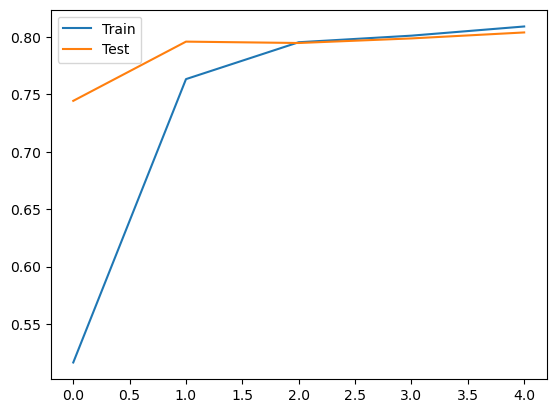

In [29]:
plt.plot(range(5),classifier.history['accuracy'],label='Train')
plt.plot(range(5),classifier.history['val_accuracy'],label='Test')
plt.legend()

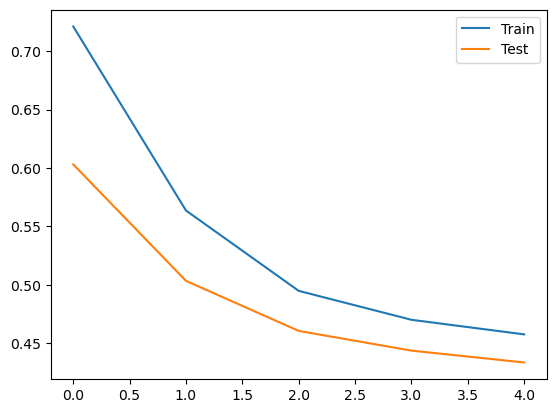

In [30]:
plt.plot(range(5),classifier.history['loss'],label='Train')
plt.plot(range(5),classifier.history['val_loss'],label='Test')
plt.legend()

In [31]:
y_pred=model.predict(x_test)

79/79 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import accuracy_score,classification_report

In [33]:
a=[]
for i in range(len(y_pred)):
    a.append(np.argmax(y_pred[i]))

In [34]:
a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [35]:
b=[]
for i in range(len(y_test)):
    b.append(np.argmax(y_test[i]))

In [36]:
b

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,


In [37]:
df=pd.DataFrame(a,columns=['predicted values'])
df

,predicted values
0,0
1,0
2,0
3,0
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [38]:
df['actual values']=b
df

,predicted values,actual values
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2495,0,0
2496,0,0
2497,0,0
2498,0,0


In [39]:
accuracy_score(df['predicted values'],df['actual values'])

0.804

In [40]:
print(classification_report(df['predicted values'],df['actual values']))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      2463
           1       0.06      0.84      0.11        37

    accuracy                           0.80      2500
   macro avg       0.53      0.82      0.50      2500
weighted avg       0.98      0.80      0.88      2500

